# <img style="float: left; padding-right: 20px; width: 100px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

----

# <h1><center>Tarea 0: Herramientas Computacionales para Ciencia de Datos </center></h1>
    
## 1. Objetivos de Aprendizaje

Esta Tarea es un ejercicio de prueba, y tiene como objetivo probar el ambiente de programación de cada estudiante, la instalación de librerías de Python y la configuración de su repositorio, mediante la entrega y ejecución de un Jupyter Notebook de ejemplo. 

Esta Tarea sólo requiere conocimientos generales de programación en Python, y no será calificada. Sin embargo, su entrega es requisito para acceder al repositorio de la siguiente Tarea 1.


## 2. GitHub

## 3. Módulos de Python

### 3.1 Importación de módulos.

Todos los Notebooks y códigos deberían comenzar con la importación de módulos, o librerías de funciones built-in para distintos usos. Para facilitar la referencia a librerías en el resto del código, se acostumbra asignarles un alias. La sintaxis general a usar para importar un módulo es:


``import NOMBRE_MODULO as ALIAS_MODULO``

In [1]:
conda install --channel=conda-forge geopandas


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importación de librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests, zipfile, io


## 4. Ejericio de Prueba: Inspección de Datos del Censo 2017.

El código a continuación permite descargar, leer, hacer algunos cálculos básicos y visualizar los datos de población del Censo chileno de 2017 para la región metropolitana. En este notebook, ud. sólo debe ejecutar las celdas de código a continuación, hasta generar una figura con la distribución de población total por manzana censal en la RM. 
Como demostración de la ejecución exitosa del código, sólo debe submitir esta figura final a su repositorio de Github.


In [3]:

#Descargar datos de la página del Censo
url ='http://www.censo2017.cl/descargas/microdatos/Censo2017_ManzanaEntidad_CSV.zip'



r = requests.get(url, stream=True)
print(r.url)

#Descomprimir resultados
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#Leer archivo enun DataFrame
dat=pd.read_csv('Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas.csv',delimiter=';')

#Visualizar las primeras lineas
dat.head()


http://www.censo2017.cl/descargas/microdatos/Censo2017_ManzanaEntidad_CSV.zip


,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,MZ_ENT,ID_ZONA_LOC,ID_MANZENT,PERSONAS,...,MATREC,MATIRREC,P05_1,P05_2,P05_3,P05_4,REGION_15R,PROVINCIA_15R,COMUNA_15R,ID_MANZENT_15R
0,1,11,1101,1,1,1,1,7849,1101011001001,15,...,0,0,0,0,0,0,1,11,1101,1101011001001
1,1,11,1101,1,1,1,10,7849,1101011001010,70,...,1,0,15,0,0,0,1,11,1101,1101011001010
2,1,11,1101,1,1,1,11,7849,1101011001011,36,...,5,0,15,0,0,0,1,11,1101,1101011001011
3,1,11,1101,1,1,1,12,7849,1101011001012,65,...,9,4,24,0,0,0,1,11,1101,1101011001012
4,1,11,1101,1,1,1,13,7849,1101011001013,39,...,0,0,9,0,0,0,1,11,1101,1101011001013


### ¿Cuál era la población total de Chile en 2017?

Para responder esta pregunta, podemos hacer un cálculo sencillo y sumar todos los datos de la columna `PERSONAS`:

In [4]:
#Total de población
total_pop=dat['PERSONAS'].sum()
print('Población total en 2017:',total_pop)

Población total en 2017: 17574003


También podemos usar algunas funciones más avanzadas de `pandas`para analizar la distribución de personas por región y edad:

In [5]:
#Distribución por edad y género
cols=['EDAD_0A5','EDAD_6A14','EDAD_15A64','EDAD_65YMAS','PERSONAS']
for col in cols:
    dat[col]=dat[col].replace('*',0).astype(float)
    
pv=pd.pivot_table(dat,index='REGION',values=cols,aggfunc = np.sum)
pv

,EDAD_0A5,EDAD_15A64,EDAD_65YMAS,EDAD_6A14,PERSONAS
REGION,,,,,
1,27089.0,225991.0,22784.0,42860.0,330558.0
2,40763.0,427746.0,40299.0,70497.0,607534.0
3,18862.0,188979.0,23711.0,33304.0,286168.0
4,49130.0,498186.0,77212.0,83390.0,757586.0
5,110371.0,1212273.0,222900.0,176235.0,1815902.0
6,58426.0,609723.0,96677.0,100364.0,914555.0
7,62106.0,695161.0,111206.0,108436.0,1044950.0
8,98184.0,1049723.0,164977.0,166678.0,1556805.0
9,57165.0,629746.0,103612.0,99561.0,957224.0


A continuación, usaremos la cartografía central para generar una figura o mapa con la distribución de población total por manzana censal en la región metropolitana (RM):

In [6]:
url='https://raw.githubusercontent.com/imt2200/resources/master/MANZANA_IND_C17.shp'
r = requests.get(url, stream=True)
open('R13/MANZANA_IND_C17.shp', 'wb').write(r.content)

url='https://raw.githubusercontent.com/imt2200/resources/master/MANZANA_IND_C17.shx'
r = requests.get(url, stream=True)
open('R13/MANZANA_IND_C17.shx', 'wb').write(r.content)

390524

C:\Users\larry\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\larry\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\larry\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\larry\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\larry\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\larry\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  f

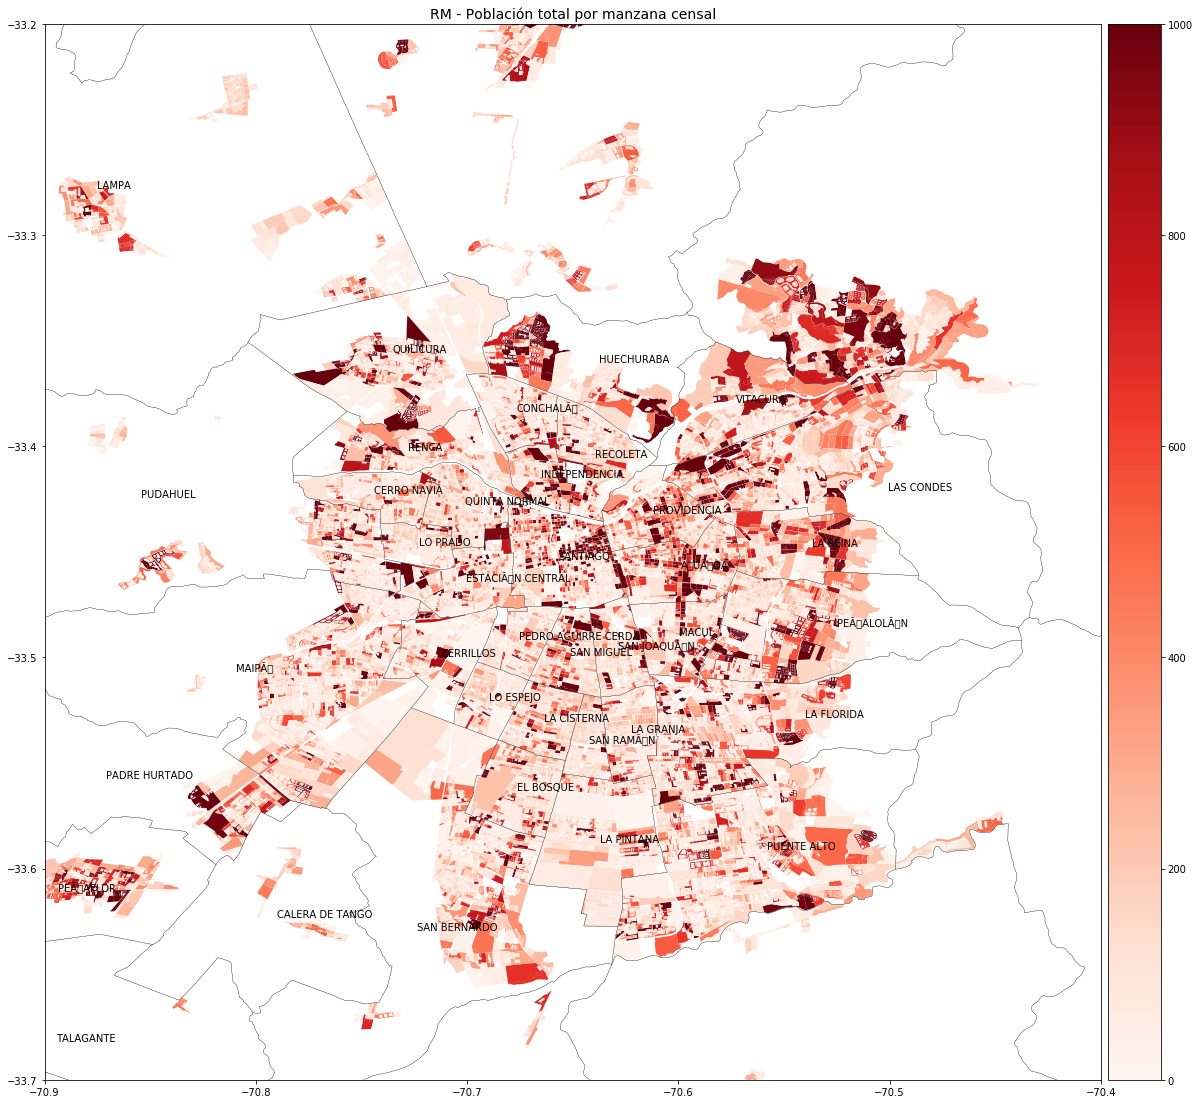

In [7]:


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

#Crear figura y ejes
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

#Leer datos censales
manz=gpd.read_file('R13/MANZANA_IND_C17.shp')
com=gpd.read_file('R13/COMUNA_C17.shp')


Z=manz['TOTAL_PERS']
manz.plot(ax=ax,column='TOTAL_PERS',cmap='Reds',legend=True, vmin=0,vmax=1000,cax=cax)

com.boundary.plot(ax=ax,lw=0.2,color='k')

xlim=[-70.9,-70.4]
ylim=[-33.7,-33.2]
for x, y, label in zip(com.geometry.centroid.x, com.geometry.centroid.y, com.NOM_COMUNA):
    if xlim[0]<x<xlim[1] and ylim[0]<y<ylim[1]:
        ax.text(x, y, label, fontsize = 10)
        
ax.set_xlim(xlim)
ax.set_ylim(ylim);

ax.set_title('RM - Población total por manzana censal',fontsize=14)

## Reemplace 'XXX' por su apellido en el nombre del archivo de salida 
fig.savefig('PoblacionRM_C2017_LUA.jpg')